<a href="https://colab.research.google.com/github/saniagonsalves/DM_assignment_part1/blob/main/D_Sania_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name- Sania Gonsalves

Data Mining Assignment

**a) K-Means clustering**

**Dataset file name : countries of the world.csv**

Dataset link- https://drive.google.com/file/d/1TD7h6IXliVLM4tt5jLfrH3qYk7eHsk4f/view?usp=sharing


**To find the co-relation between literacy and Infant mortality of the countries using K- means clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

**Import data**

In [ ]:
data = pd.read_csv('/content/countries of the world.csv', decimal=',')

**Number of rows in data**

In [ ]:
data.shape

(227, 20)

In [ ]:
data.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


**Display number of columns in data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

**List all the functions in data**

In [ ]:
data.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

**Drop null value rows**

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    float64
 5   Coastline (coast/area ratio)        179 non-null    float64
 6   Net migration                       179 non-null    float64
 7   Infant mortality (per 1000 births)  179 non-null    float64
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    float64
 10  Phones (per 1000)                   179 non-null    float64
 11  Arable (%)                          179 non-n

**Preprocess the data delete unwanted rows**

In [ ]:
del data['Arable (%)']
del data['Crops (%)']
del data['Other (%)']
del data['Climate']

Text(0, 0.5, 'Infant mortality (per 1000 births)')

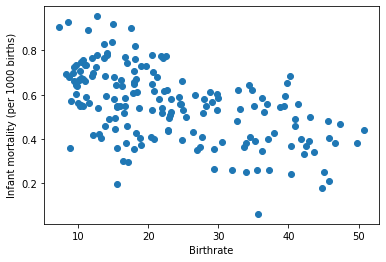

In [ ]:
plt.scatter(data.Birthrate,data['Service'])
plt.xlabel('Birthrate')
plt.ylabel('Infant mortality (per 1000 births)')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Literacy (%)','Infant mortality (per 1000 births)']])
y_predicted

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2,
       2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 2], dtype=int32)

In [ ]:
data['cluster']=y_predicted
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service,cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,46.60,20.34,0.380,0.240,0.380,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,15.11,5.22,0.232,0.188,0.579,1
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,17.14,4.61,0.101,0.600,0.298,1
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,14.17,5.34,0.040,0.180,0.780,1
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,16.93,5.37,0.038,0.220,0.743,1


In [ ]:
km.cluster_centers_

array([[ 49.47727273, 108.        ],
       [ 92.85625   ,  15.26294643],
       [ 70.65777778,  63.94044444]])

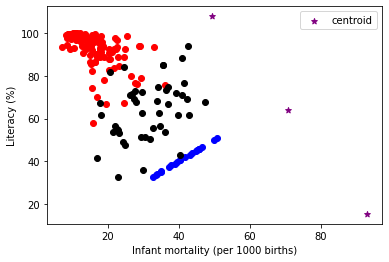

In [ ]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.Birthrate,df1['Birthrate'],color='blue')
plt.scatter(df2.Birthrate,df2['Literacy (%)'],color='red')
plt.scatter(df3.Birthrate,df3['Infant mortality (per 1000 births)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Infant mortality (per 1000 births)')
plt.ylabel('Literacy (%)')
plt.legend()

**Preprocessing using min max scaler**

In [ ]:
scaler = MinMaxScaler()

scaler.fit(data[['Literacy (%)']])
data['Literacy (%)'] = scaler.transform(data[['Literacy (%)']])

scaler.fit(data[['Infant mortality (per 1000 births)']])
data['Infant mortality (per 1000 births)'] = scaler.transform(data[['Infant mortality (per 1000 births)']])

In [ ]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service,cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,1.000000,700.0,0.223301,3.2,46.60,20.34,0.380,0.240,0.380,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,0.119604,4500.0,0.836165,71.2,15.11,5.22,0.232,0.188,0.579,1
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,0.178567,6000.0,0.635922,78.1,17.14,4.61,0.101,0.600,0.298,1
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,0.116557,8600.0,0.939320,460.0,14.17,5.34,0.040,0.180,0.780,1
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,0.106792,11000.0,0.866505,549.9,16.93,5.37,0.038,0.220,0.743,1


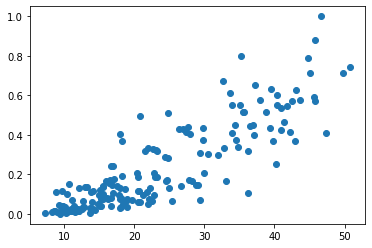

In [ ]:
plt.scatter(data.Birthrate,data['Infant mortality (per 1000 births)'])

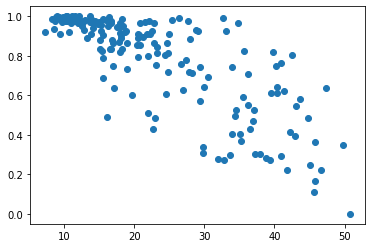

In [ ]:
plt.scatter(data.Birthrate,data['Literacy (%)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Literacy (%)','Infant mortality (per 1000 births)']])
y_predicted

array([2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0,
       0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1,
       1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       2, 0, 0], dtype=int32)

In [ ]:
data['cluster']=y_predicted
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service,cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,1.000000,700.0,0.223301,3.2,46.60,20.34,0.380,0.240,0.380,2
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,0.119604,4500.0,0.836165,71.2,15.11,5.22,0.232,0.188,0.579,1
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,0.178567,6000.0,0.635922,78.1,17.14,4.61,0.101,0.600,0.298,0
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,0.116557,8600.0,0.939320,460.0,14.17,5.34,0.040,0.180,0.780,1
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,0.106792,11000.0,0.866505,549.9,16.93,5.37,0.038,0.220,0.743,1


In [ ]:
km.cluster_centers_

array([[0.73236058, 0.34739945],
       [0.93273898, 0.0752019 ],
       [0.35251062, 0.56242225]])

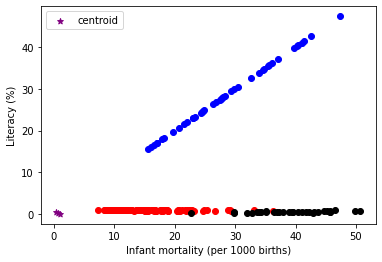

In [ ]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.Birthrate,df1['Birthrate'],color='blue')
plt.scatter(df2.Birthrate,df2['Literacy (%)'],color='red')
plt.scatter(df3.Birthrate,df3['Infant mortality (per 1000 births)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Infant mortality (per 1000 births)')
plt.ylabel('Literacy (%)')
plt.legend()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    float64
 5   Coastline (coast/area ratio)        179 non-null    float64
 6   Net migration                       179 non-null    float64
 7   Infant mortality (per 1000 births)  179 non-null    float64
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    float64
 10  Phones (per 1000)                   179 non-null    float64
 11  Birthrate                           179 non-n

In [ ]:
column_name=data.columns

**Find co-relation between Literacy of the country and Infant mortality**

In [ ]:
 X_dataset=data[['Infant mortality (per 1000 births)','Literacy (%)']] ;
X_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Infant mortality (per 1000 births)  179 non-null    float64
 1   Literacy (%)                        179 non-null    float64
dtypes: float64(2)
memory usage: 4.2 KB


**Clustering by K means Using Scikit**

In [ ]:
ka=[]
for i in range(1,6):
    kmeans = KMeans(n_clusters= i, init='k-means++')
    kmeans.fit(X_dataset)
    ka.append(kmeans.inertia_)

**Elbow method to determine the clusters in unsupervised learning**

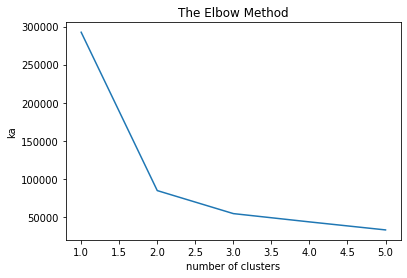

In [ ]:
plt.plot(range(1,6), ka)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('ka')
plt.show()

In [ ]:
# K-Means using selected number of clusters from the elbow method
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_dataset)
kmeansmodel = KMeans(n_clusters= 2, init='k-means++')
y_kmeans= kmeansmodel.fit_predict(X_dataset)
y_kmeans

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0], dtype=int32)

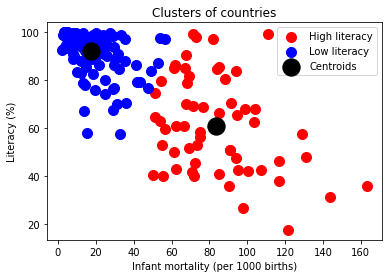

In [ ]:
# Visualise the clusters
X_dataset = np.array(X_dataset)
plt.scatter(X_dataset[y_kmeans == 0, 0], X_dataset[y_kmeans == 0, 1], s = 100, c = 'red', label = 'High literacy')
plt.scatter(X_dataset[y_kmeans == 1, 0], X_dataset[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low literacy')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of countries')
plt.ylabel('Literacy (%)')
plt.xlabel('Infant mortality (per 1000 births)')
plt.legend()
plt.show()

Analysis of relation between the column Literacy (%) and Infant mortality (per 1000 births):
* We can see that a literacy is a good indicator of the countries infant mortality rate
* Countries with high literacy(red cluster) have low Infant mortality
* Countries with low literacy(blue cluster) have high Infant mortality 
